# <u>Tut_12.1</u>

## Learning outcomes

* Unsupervised ML
* **K-means** clustering
* Deploy your ML model with **Panel**

---

## ML model selection

![ML model selection](../assets/img/model_selection.jpg)

### **Supervised** vs. **Unsupervised** ML. What is the difference?

![Buttons](https://rainydaymum.co.uk/wp-content/uploads/2016/04/button-box-abc-3.jpg)

[Source](https://rainydaymum.co.uk)


* Supervised: learning from **labeled** data in a training dataset. Examples:
	* Classification
	* Regression
* Unsupervised: learning from **unlabeled** data. Algorithm tries to find hidden patterns in dataset without being told what they are
	* Clustering (one example) - grouping similar data together. Trying to find the best way to group. Applications: customer segmentation, document grouping, anomaly detection, fraud detection ...

### K-means clustering
* **K-means clustering** is an *unsupervised* machine learning algorithm used to group similar data points into clusters based on their proximity to **cluster centroids**
* ***k*** number of clusters is a **hyperparameter**

![k-mean clustering](../assets/img/k-means_2.png)

We all belong to a cluster

<img src="../assets/img/k-means_3.png" width="80%">

### Centroid
* In k-means clustering, a **centroid** represents the center of a cluster
* It is typically calculated as the mean of all data points within that cluster
* The algorithm aims to find these centroids such that data points are grouped into clusters where points within each cluster are closer to their respective centroid than to any other cluster's centroid
* Centroid might not necessarily be a member of the dataset

[Image source](https://www.lancaster.ac.uk/stor-i-student-sites/harini-jayaraman/k-means-clustering/)

---

## Clustering of mall customers

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

### Import data

In [2]:
df = pd.read_csv('../raw_datasets/k-means/mall_customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


### EDA

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##### Rename columns

In [6]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income',
                   'Spending Score (1-100)': 'Spending_Score'
                   }, inplace=True)

In [7]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Data graphical overview - sns pairplot

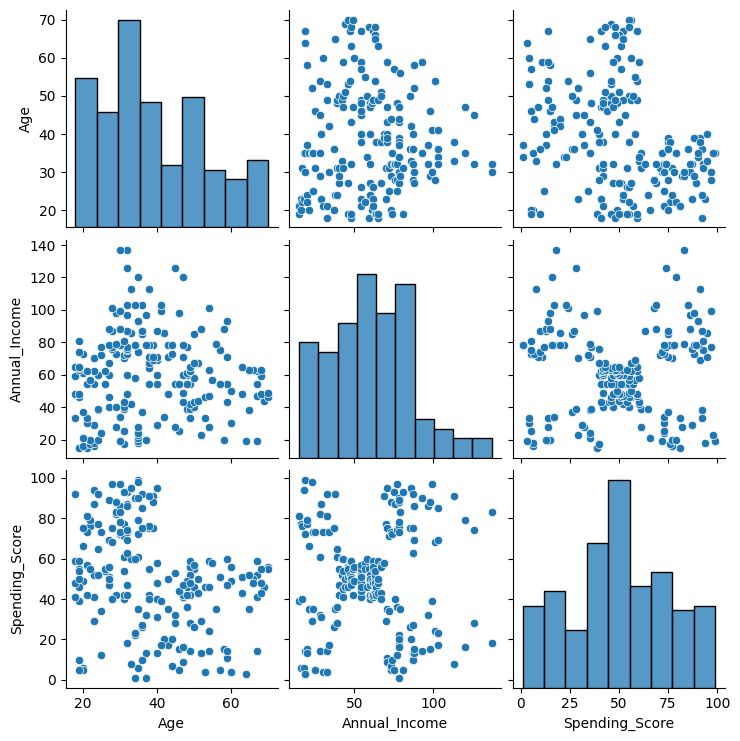

In [8]:
sns.pairplot(data=df[['Age', 'Annual_Income', 'Spending_Score']])
plt.show()

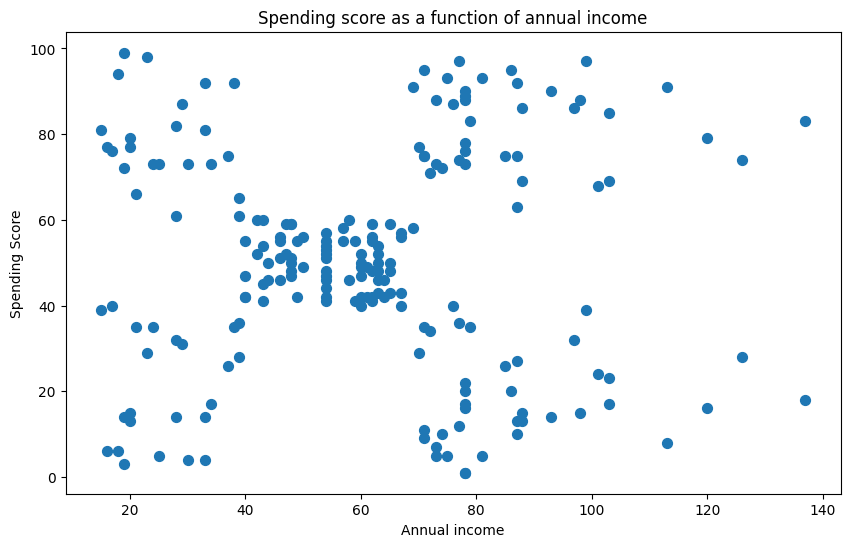

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual_Income'], df['Spending_Score'], s=50)
plt.title('Spending score as a function of annual income')
plt.xlabel('Annual income')
plt.ylabel('Spending Score')
plt.show()

In [10]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

### Applying k-means model to our dataset

#### Select features for clustering

In [11]:
X = df[['Annual_Income', 'Spending_Score']]


### "Elbow" method to figure out the number of clusters

* One has to be minimalistic in selecting number of clusters
* Number of lusters must be as small as possible

#### WCSS - Within-cluster sum of squares
* Quantifies how close the data points in a cluster are to the cluster centroid
* Lower WCSS means tighter, more compact clusters
* As you increase *k* (the number of clusters), WCSS decreases, but with diminishing returns
* This is why the elbow method is used to find the optimal number of clusters — by plotting WCSS vs. number of clusters and finding the "elbow" point

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


#### WCSS vs. cluster number "elbow" plot

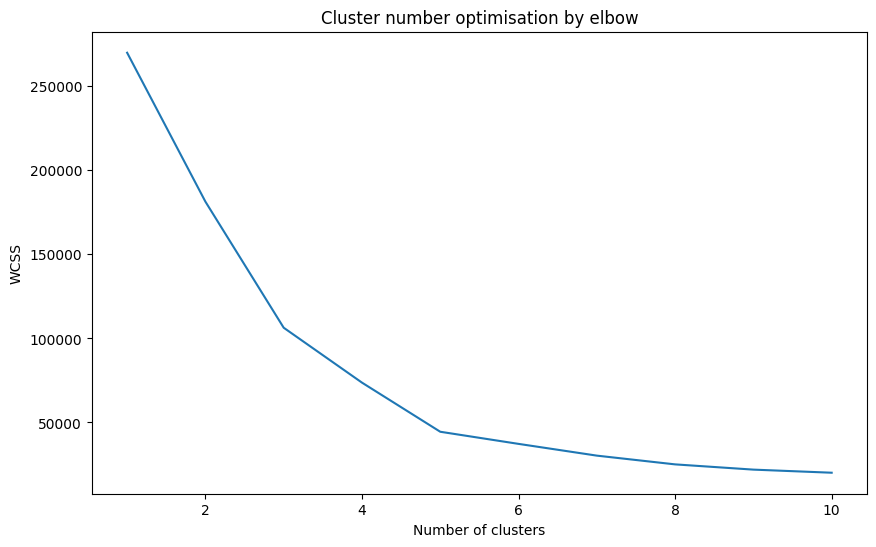

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Cluster number optimisation by elbow")
plt.show()

Above: optimal number of clusters is 5.

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)

In [15]:
y_kmeans = kmeans.fit_predict(X)

In [16]:
df['Cluster'] = y_kmeans

In [17]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


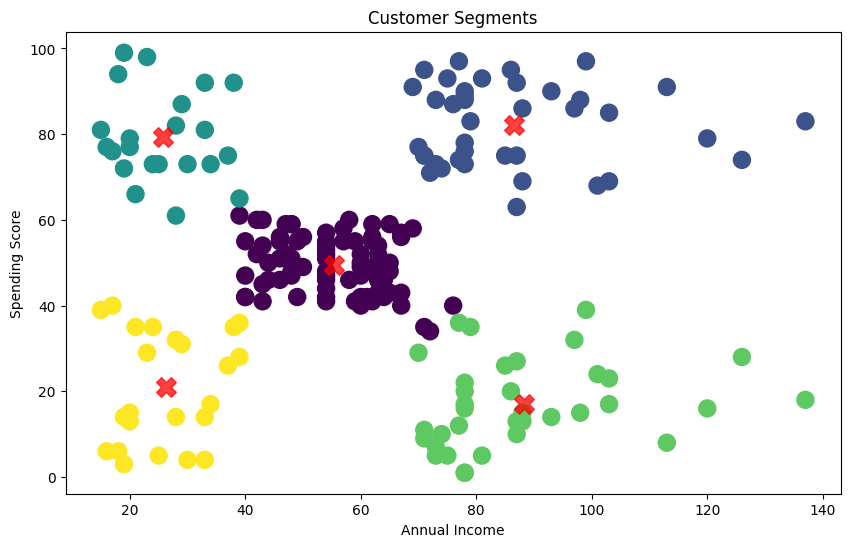

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=150, cmap='viridis')  # review slicing through iterables; 0, 1 stands for columns
centers = kmeans.cluster_centers_  # Retrieves coordinates of cluster centers
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=.75, marker='X')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments")
plt.show()

Needs interpretation

### We select other features here for plotting

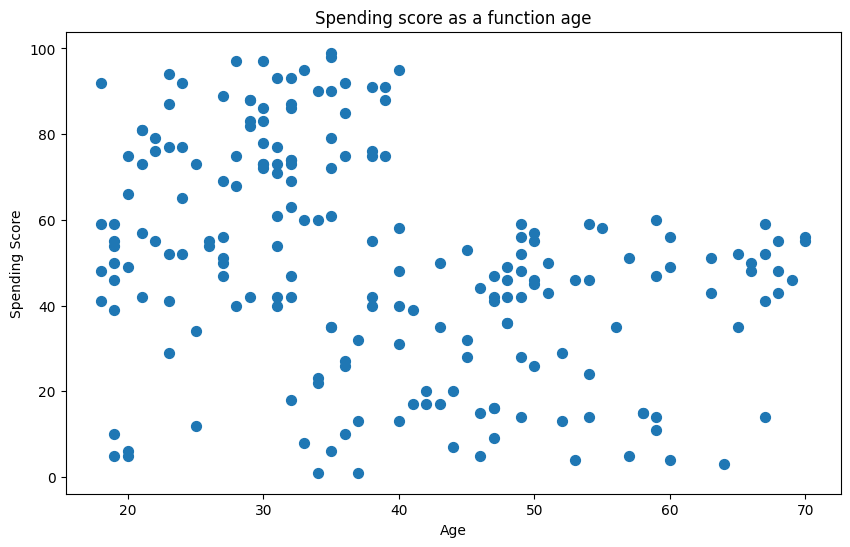

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Spending_Score'], s=50)
plt.title('Spending score as a function age')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

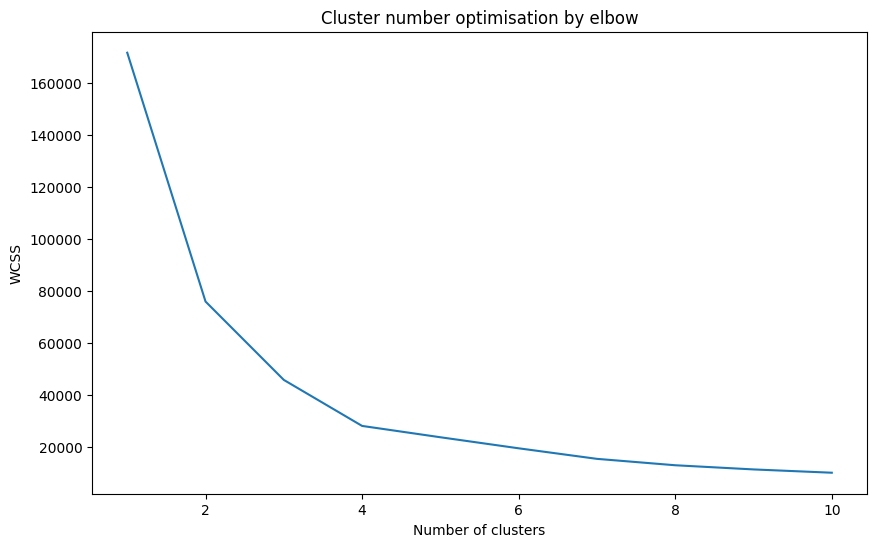

In [20]:
# Elbow method again
X = df[['Age', 'Spending_Score']]
# Within cluster sum of squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Cluster number optimisation by elbow")
plt.show()


In [21]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)
df['Cluster_Age'] = y_kmeans

In [22]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster,Cluster_Age
0,1,Male,19,15,39,4,3
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,4,2
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,4,3


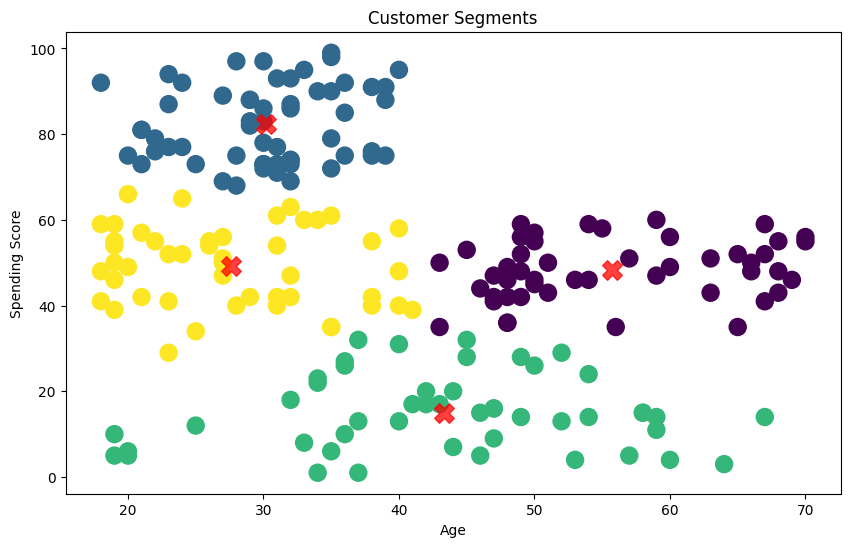

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, s=150, cmap='viridis')  # review slicing through iterables; 0, 1 stands for columns
centers = kmeans.cluster_centers_  # Retrieves coordinates of cluster centers
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=.75, marker='X')
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Customer Segments")
plt.show()

### 3D plot of all 3 features

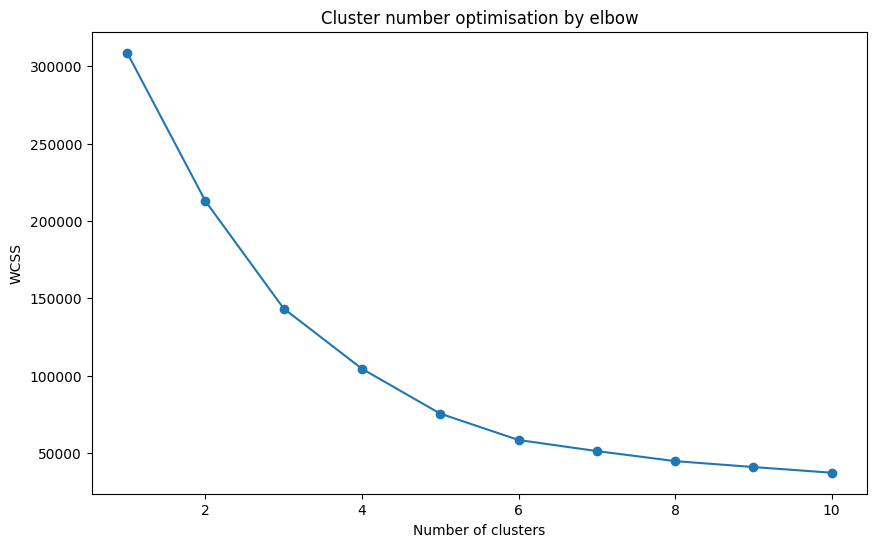

In [24]:
X = df[['Age', 'Annual_Income', 'Spending_Score']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Cluster number optimisation by elbow")
plt.show()


Optimal number of clusters is 6

In [25]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [26]:
df['Cluster_Age_Income_Spend'] = y_kmeans

In [27]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster,Cluster_Age,Cluster_Age_Income_Spend
0,1,Male,19,15,39,4,3,5
1,2,Male,21,15,81,2,1,2
2,3,Female,20,16,6,4,2,5
3,4,Female,23,16,77,2,1,2
4,5,Female,31,17,40,4,3,5


## Visualising clusters in 3D

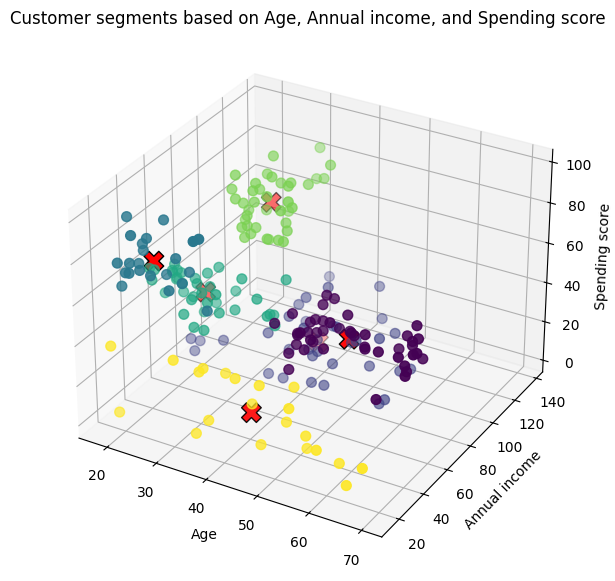

In [28]:
centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    df['Age'],
    df['Annual_Income'],
    df['Spending_Score'],
    c=df['Cluster_Age_Income_Spend'],
    s=50,
    cmap='viridis'
)
ax.scatter(
    centroids[:, 0],  # Age
    centroids[:, 1],  # Annual Income
    centroids[:, 2],  # Spending Score
    s=200,
    c='red',
    marker='X',
    edgecolor='black',
    label='Centroids'
)
ax.set_xlabel("Age")
ax.set_ylabel("Annual income")
ax.set_zlabel("Spending score")
plt.title("Customer segments based on Age, Annual income, and Spending score")
plt.show()

## Prediction

#### Prepare input
The new person (customer) is:
* Age: 30
* Annual income: 60k
* Spending score: 50

#### Create input for this customer:

In [29]:
# new_customer = np.array([[30, 60, 50]])
new_customer_df = pd.DataFrame([[30, 60, 50]], columns=['Age', 'Annual_Income', 'Spending_Score'])  # N.b.: _2D_array_

#### Predict the cluster

In [30]:
cluster_label = kmeans.predict(new_customer_df)
print(f"The customer belongs to cluster: {cluster_label[0]}")

The customer belongs to cluster: 3


#### Print a distance from a cluster centroid

In [31]:
distances = kmeans.transform(new_customer_df)
print("Distances to cluster centers:", distances)

Distances to cluster centers: [[26.99624116 44.76195542 45.37829969  4.57425652 41.75835277 48.41321103]]


---

## Deploy your model with Panel

[Panel](https://panel.holoviz.org/)

In [32]:
%pip install panel jupyter_bokeh



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [33]:
import panel as pn
pn.extension()

In [34]:
pn.extension()

# Input widgets
age_input = pn.widgets.IntSlider(name='Age', start=15, end=80, value=30)
income_input = pn.widgets.IntSlider(name='Annual Income (k$)', start=15, end=150, value=60)
score_input = pn.widgets.IntSlider(name='Spending Score (1–100)', start=1, end=100, value=50)

# Output widget
output = pn.pane.Markdown("**Predicted Cluster:** _None yet_")

# Callback function
def predict_cluster(event=None):
    input_data = np.array([[age_input.value, income_input.value, score_input.value]])
    cluster = kmeans.predict(input_data)[0]
    distances = kmeans.transform(new_customer_df)
    output.object = f"**Predicted Cluster:** {cluster}"
    
# Button to trigger prediction
predict_button = pn.widgets.Button(name="🧠 Predict Cluster", button_type="primary")
predict_button.on_click(predict_cluster)

# Layout
dashboard = pn.Column(
    "### 🛍️🤖 Customer Cluster Predictor",
    age_input,
    income_input,
    score_input,
    predict_button,
    output
)

dashboard.servable()


BokehModel(combine_events=True, render_bundle={'docs_json': {'4c32844c-7ada-4005-9bbd-48ef6fd1776a': {'version…